# Opening HDF (.h5) files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray

import cartopy
import cartopy.util
import cartopy.io.shapereader
import pandas

import h5py

In [2]:
smap_ds = h5py.File('../data/satellite-data/smap-hdf5/SMAP_L4_SM_aup_20180420T030000_Vv3030_001.h5', 'r')

In [3]:
smap_ds.keys()

<KeysViewHDF5 ['Analysis_Data', 'Forecast_Data', 'Metadata', 'Observations_Data', 'cell_column', 'cell_lat', 'cell_lon', 'cell_row', 'time']>

In [4]:
list(smap_ds['Observations_Data'])

['tb_h_obs',
 'tb_h_obs_assim',
 'tb_h_obs_errstd',
 'tb_h_obs_time_sec',
 'tb_h_orbit_flag',
 'tb_h_resolution_flag',
 'tb_v_obs',
 'tb_v_obs_assim',
 'tb_v_obs_errstd',
 'tb_v_obs_time_sec',
 'tb_v_orbit_flag',
 'tb_v_resolution_flag']

In [5]:
list(smap_ds['Analysis_Data'])

['sm_profile_analysis',
 'sm_profile_analysis_ensstd',
 'sm_rootzone_analysis',
 'sm_rootzone_analysis_ensstd',
 'sm_surface_analysis',
 'sm_surface_analysis_ensstd',
 'soil_temp_layer1_analysis',
 'soil_temp_layer1_analysis_ensstd',
 'surface_temp_analysis',
 'surface_temp_analysis_ensstd']

In [6]:
smap_lat = smap_ds['cell_lat'][()]
smap_lon = smap_ds['cell_lon'][()]

In [7]:
smap_data = smap_ds['Analysis_Data']['sm_profile_analysis'][()]

In [8]:
smap_data[smap_data==-9999.]=np.nan

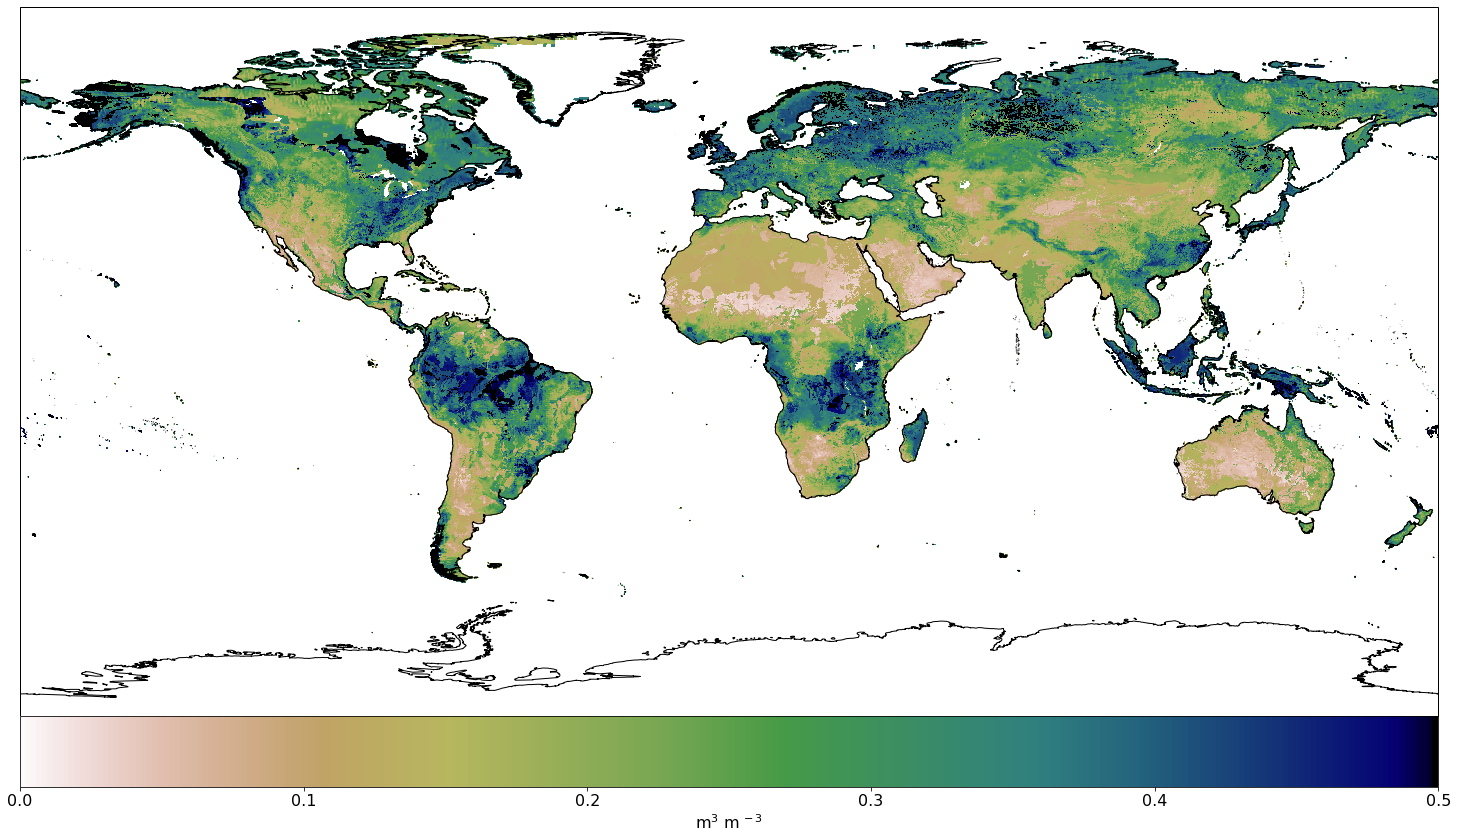

In [10]:
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1,1, subplot_kw={'projection':map_crs})
fig.set_size_inches(20,20)

ax.coastlines(resolution='10m')

smap_plot = ax.pcolormesh(smap_lon,
                          smap_lat,
                          smap_data,
                          transform=data_crs,
                          vmin=0,
                          vmax=0.5,
                          cmap='gist_earth_r')

fig.tight_layout()

cbar = plt.colorbar(smap_plot, orientation='horizontal', fraction=0.1, pad=0.)
cbar.set_label('m$^{3}$ m$^{\,-3}$', fontsize=16)
cbar.ax.tick_params(labelsize=16)